In [ ]:
# 배깅 기법 (Bagging)
# 부트스트랩과 어그리게이팅 기법을 혼합한 앙상블 기법

# 부트스트랩 (Bootstrap) : 데이터를 조금은 편향되도록 샘플링하는 기법 (중복 데이터를 허용하여 조금 편항된 데이터 생성)

# 어그리게이팅 (Aggregating) : 여러 분류 모델이 예측한 값들을 조합하여 결론을 도출하는 과정 (보팅을 통해 결론 도출)
# 하드 보팅 : 배깅에 포함된 K개의 분류 모델에서 최대 득표를 받은 예측값으로 결론 도출
# 소프트 보팅 : 모든 분류값의 확률을 리턴하고, 각 분류값별 확률을 더해준 값을 점수로 사용하여
# 최대 점수 가진 분류값으로 결론 도출

# 랜덤 포레스트 (RF)
# 여러 의사결정 트리를 배깅해서 예측을 실행하는 모델 (의사결정 트리의 오버피팅을 줄이고 성능을 높임)
# 의사결정 트리에선 최적의 특징으로 트리를 분기하지만, RF 에서는 각 노드에 주어진 데이터를 샘플링해서
# 일부 데이터를 제외한 채 최적의 특징을 찾아 트리를 분기하게 됨 (이 과정에서 모델의 편향을 증가시켜 오버피팅 위험 감소)

# 부스팅 (Boosting)
# 서로 다른 알고리즘에 기반한 여러 분류기를 병렬적으로 학습하는 배깅과 다르게
# 동일한 알고리즘의 분류기를 순차적으로 학습하여 여러 개의 분류기를 만든 후,
# 테스트를 할 때 가중 투표를 통해 예측값을 결정하는 앙상블 기법

In [1]:
# 랜덤 포레스트로 손글씨 분류하기
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# 손글씨 데이터 불러오기
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target

In [3]:
# 교차 검증
def cross_validation(classifier,features, labels):
    cv_scores = []
    for i in range(10):
        scores = cross_val_score(classifier, features, labels,
                                 cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())
    return cv_scores

In [5]:
dt_cv_scores = cross_validation(tree.DecisionTreeClassifier(), features, labels)
rf_cv_scores = cross_validation(RandomForestClassifier(), features, labels)

<AxesSubplot:>

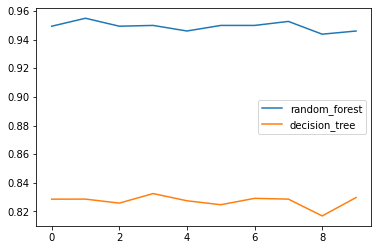

In [13]:
#  랜덤 포레스트 vs 의사결정 트리 정확도 시각화
cv_list = [
    ['random_forest', rf_cv_scores],
    ['decision_tree', dt_cv_scores]
]

df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

In [14]:
# 의사결정 트리 정확도
np.mean(dt_cv_scores)

0.8271911855990067

In [15]:
# 랜덤 포레스트 정확도
np.mean(rf_cv_scores)



0.9491883923029174